# Classification model evaluation: F1 and ROC
### Use 'Book club.csv'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Divide the data into 75% training and 25% test data (use random_state=100) and run the following logit model on training data. Report the coefficients.
- **(M1) Buy = β0 + β1 Male + β2 Buyamt + β3 Freq + β4 Lastbuy + β5 Firstbuy + β6 Child + β7 Youth + β8 Cook + β9 DIY + β10 Art + e**

In [2]:
# Read data

df = pd.read_csv('Book club.csv')
df.head()

,id,buy,male,buyamt,freq,lastbuy,firstbuy,child,youth,cook,diy,art
0,1,0,1,123,12,1,12,0,1,0,0,0
1,2,0,1,294,6,2,8,0,1,1,0,0
2,3,0,1,138,14,9,38,1,1,3,2,1
3,4,0,1,228,2,1,2,0,1,0,0,0
4,5,0,1,102,22,2,24,2,0,0,0,0


In [11]:
# Define y, x

y=df.buy
x=df.iloc[ : , 2: ]
# x=df.iloc[:, 2:]  # alternative

In [12]:
# Divide x into training and test sets. Run logistic regression and obtain coefficients.

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=10)
m = LogisticRegression(max_iter=300).fit(xtrain, ytrain)
m.coef_

array([[-0.89420488,  0.00126018, -0.09609367,  0.41964856, -0.01046302,
        -0.60473712, -0.36970005, -0.672284  , -0.73803235,  0.7246408 ]])

### 2. Report model Accuracy, Precision, Recall, and F1 score on test data. Summarize your observation.

In [13]:
# Predict y and obtain scores

pred = m.predict(xtest)  # predict y on test data
print('Accuracy', metrics.accuracy_score(ytest, pred))
 # m.score(xtest, ytest)  # Alternative
print('Precision', metrics.precision_score(ytest, pred))  # TP/P*
print('Recall', metrics.recall_score(ytest, pred))     # TP/P
print('F1 Score', metrics.f1_score(ytest, pred))

Accuracy 0.9405714285714286
Precision 1.0
Recall 0.05454545454545454
F1 Score 0.10344827586206896


### 3. Report confusion matrix

In [14]:
# Obtain confusion matrix

metrics.confusion_matrix(ytest, pred)

array([[820,   0],
       [ 52,   3]])

|          | Predicted 0   | Predicted 1 |
|----------|:-------------:|------------:|
| Actual 0 |       TN      |      FP     |
| Actual 1 |       FN      |      TP     |

### 4. Report True negative rate (TNR), False positive rate (FPR), True positive rate (TPR), and False negative rate (FNR)

In [15]:
# Report TNR, FPR, TPR, FNR 

print('TNR', 820/(820+0))  # TN/N: Specificity
print('FPR', 0/(820+0))  # FP/N: Type I Error (TNR+FPR=1, FPR=1-Specificity)
print('TPR', 3/(52+3))  # TP/P: Power,Sensitivity,Recall
print('FNR', 52/(52+3))  # FN/P: Type II Error (TPR+FNR=1)
 # Adjust numbers based on your results

TNR 1.0
FPR 0.0
TPR 0.05454545454545454
FNR 0.9454545454545454


### 5. What percentage of customers bought the book?

In [16]:
# Calculate the average of 'buy'

df.buy.mean()

0.05828571428571429

### 6. Draw ROC curve with AUC on test data.

In [17]:
#  Predict probablity of each sample in the test data

prob = m.predict_proba(xtest)
prob  # column 1,2: probability of negative and positive class

array([[0.9973054 , 0.0026946 ],
       [0.94643667, 0.05356333],
       [0.56692225, 0.43307775],
       ...,
       [0.86029695, 0.13970305],
       [0.98075647, 0.01924353],
       [0.84202721, 0.15797279]])

In [18]:
# Obtain predictions for positive class, fpr, tpr, decisin threshold, AUC

prob = m.predict_proba(xtest)[:,1]  # all rows and 2nd column (= positive class)
fpr, tpr, threshold = roc_curve(ytest, prob)
 # roc_curve takes observed labels with predicted prob and returns fpr,tpr,thresholds for each tpr & fpr

area = auc(fpr, tpr)  # area under the ROC curve
print('Out-of-sample AUC: %0.4f' % auc(fpr, tpr))  # '%0.4f' %: display 4 digit

Out-of-sample AUC: 0.8200


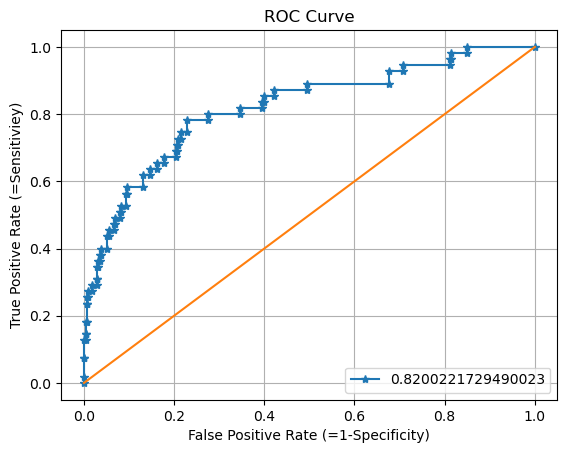

In [19]:
# Disply ROC curve

plt.plot(fpr, tpr, label=area, marker='*')
# plt.plot(fpr, tpr, label=('AUC = ', area))
# plt.plot(fpr, tpr, label='AUC = %0.4f' % area)  # 0.4f=4 digits after decimal
plt.plot([0, 1], [0, 1])  # Display straight line
plt.grid()
plt.xlabel('False Positive Rate (=1-Specificity)')
plt.ylabel('True Positive Rate (=Sensitiviey)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### (Optional) 7. What is the optimal decision threshold (probability) that maximizes (TPR-FPR)?

In [ ]:
# Obtain the optimal decision threshold 

best_thresh = threshold[np.argmax(tpr - fpr)]
best_thresh
 # np.argmax: Returns index of maximum value
 # threshold(index): Returns the threshold value corresponding to the index

In [ ]:
print(max(tpr - fpr))  # maximum of (TPR-FPR)
np.argmax(tpr - fpr)  # Index of maximum of (TPR-FPR)

### (Optional) 8. Report model accuracy, Confusion matrix, Precision, Recall, and F1 score on test data using the optimal threshold. Discuss differences in results based on the two thresholds (default vs. optimal).

In [ ]:
# Predict y using the optimal threshold and obtain scores
 # Set predicted y=1 if predicted probability exceeds the optimal threshold

pred1 = (prob >= best_thresh).astype('int')
pred1[0:5]  # first 5 values
 # pred1=1 if prob>=best_thresh, 0 otherwise
 # astype('int'): convert Boolean to integer

In [ ]:
# Obtain confusion matrix

metrics.confusion_matrix(ytest, pred1)

|          | Predicted 0   | Predicted 1 |
|----------|:-------------:|------------:|
| Actual 0 |       TN      |      FP     |
| Actual 1 |       FN      |      TP     |

In [ ]:
# Obtain accuracy, precision, recall, F1

print('Accuracy',  metrics.accuracy_score(ytest, pred1))
print('Precision', metrics.precision_score(ytest, pred1))
print('Recall',    metrics.recall_score(ytest, pred1))
print('F1 Score',  metrics.f1_score(ytest, pred1))

### 9. Run the following logit model on training data. Draw ROC curve with AUC on test data from M1 and M2.
- **(M2) Buy = β0 + β1 Male + β2 Buyamt + β3 Freq + β4 Lastbuy + β5 Firstbuy + e**

In [20]:
# Define x for M2. 

x2=df.iloc[:, 2:7]
x2

,male,buyamt,freq,lastbuy,firstbuy
0,1,123,12,1,12
1,1,294,6,2,8
2,1,138,14,9,38
3,1,228,2,1,2
4,1,102,22,2,24
...,...,...,...,...,...
3495,0,41,16,1,16
3496,1,65,26,3,42
3497,0,277,16,1,16
3498,0,170,16,2,22


In [21]:
# Divide data into training and test data. Run logistic regression training data.

xtrain2, xtest2, ytrain, ytest=train_test_split(x2, y)
m2 = LogisticRegression(max_iter=300).fit(xtrain2, ytrain)

In [22]:
# Obtain predictions for positive class, fpr, tpr, decisin threshold, AUC

prob2 = m2.predict_proba(xtest2)[:,1]  # all rows and 2nd column
 # column 1,2 of prob: probability of negative and positive class
fpr2, tpr2, threshold2 = roc_curve(ytest, prob2)
 # roc_curve takes observed labels with predicted prob and returns fpr,tpr,thresholds for each tpr & fpr
area2 = auc(fpr2, tpr2)
print('Out-of-sample AUC:', area2)

Out-of-sample AUC: 0.7588692256563643


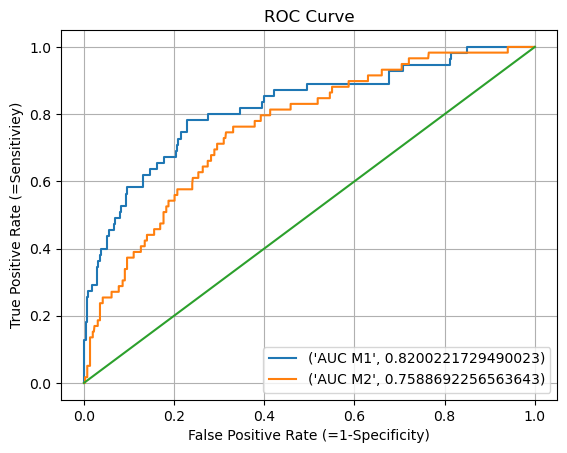

In [23]:
# Disply ROC curve for both M1, M2

plt.plot(fpr, tpr, label=('AUC M1', area))
plt.plot(fpr2, tpr2, label=('AUC M2', area2))
plt.plot([0, 1], [0, 1])  # Display straight line
plt.grid()
plt.xlabel('False Positive Rate (=1-Specificity)')
plt.ylabel('True Positive Rate (=Sensitiviey)')
plt.title('ROC Curve')
plt.legend(loc="lower right")